In [1]:
import pandas

In [2]:
avocado = pandas.read_csv('avocado.csv')

In [3]:
import seaborn

In [4]:
import matplotlib

In [5]:
%matplotlib inline

In [6]:
avocado.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany



* Some relevant columns in the dataset:
```
Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold
```

In [7]:
avocado = avocado.drop('Unnamed: 0', axis=1)

In [8]:
avocado['Date_datetime'] = avocado.Date.apply(pandas.to_datetime)

In [9]:
avocado.Date_datetime[:5]

0   2015-12-27
1   2015-12-20
2   2015-12-13
3   2015-12-06
4   2015-11-29
Name: Date_datetime, dtype: datetime64[ns]

In [10]:
matplotlib.rcParams['figure.figsize'] = (10, 8)   # Increases the Plot Size

In [11]:
seaborn.set_style('dark')

## 1. Price Trends

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


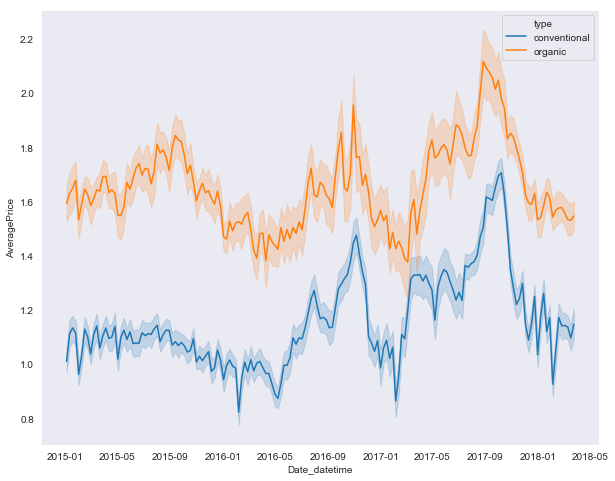

In [12]:
# Plot the average price trend, consider all the regions, chart will show the error band
seaborn.lineplot(x="Date_datetime", y="AveragePrice",
             hue="type",  palette="tab10",
             data=avocado)

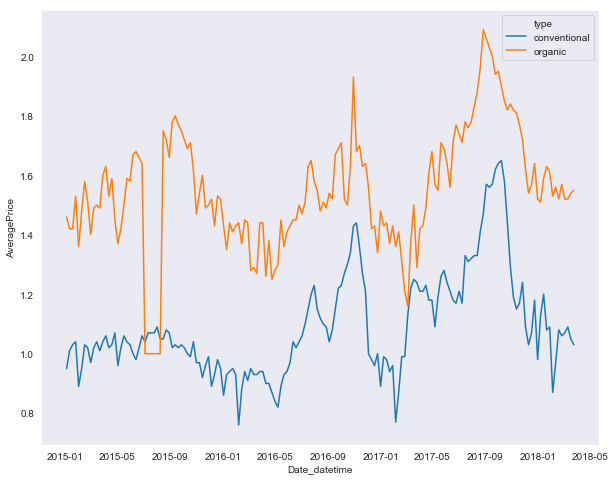

In [13]:
# Plot the national average price trend, chart will not show the error band

seaborn.lineplot(x="Date_datetime", y="AveragePrice",
             hue="type",  palette="tab10",
             data=avocado[:][avocado.region=='TotalUS'])

### (a). compare the price trends in different years

In [14]:
import datetime

In [15]:
datetime.date.isocalendar(avocado.Date_datetime[0])

(2015, 52, 7)

In [16]:
# get week number of the year  
avocado['week']=avocado.Date_datetime.apply(lambda x: datetime.date.isocalendar(x)[1])

In [17]:
avocado.week[:5]

0    52
1    51
2    50
3    49
4    48
Name: week, dtype: int64

In [18]:
avocado['month']=avocado.Date_datetime.apply(lambda x: x.month)

In [19]:
seaborn.set_style('darkgrid')

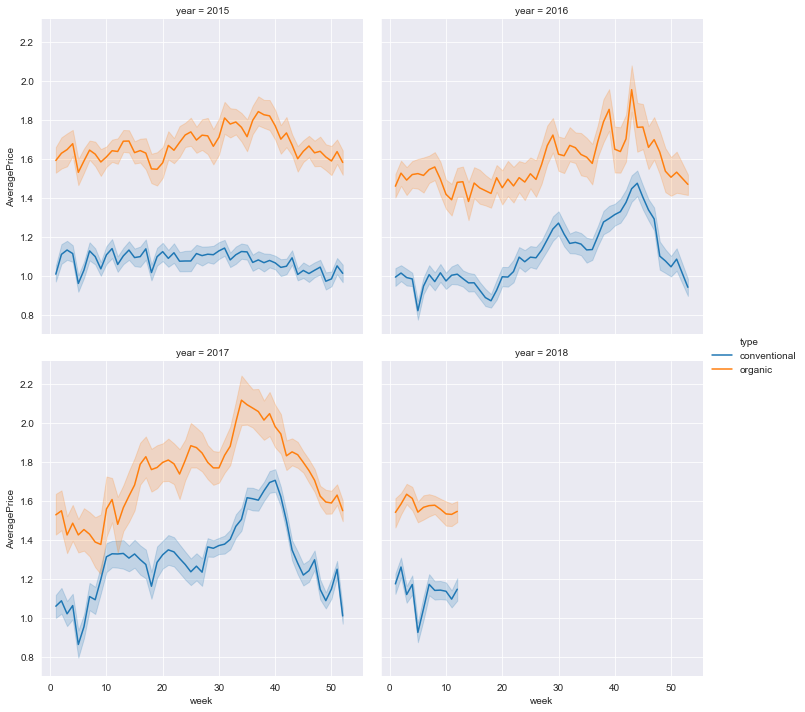

In [20]:
seaborn.relplot(x="week", y="AveragePrice", 
                col="year", kind="line",hue="type",col_wrap=2,
             data=avocado)

### (b). Compare prices in different regions

In [21]:
# Split data into subsets of different regions
region_list = avocado.region.unique()
#region_dict = {elem : pandas.DataFrame() for elem in region_list}

region_dict ={}

for key in region_list:
    region_dict [key] = avocado[:][avocado.region == key]
    
region_dict["Philadelphia"][:3]

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Date_datetime,week,month
1664,2015-12-27,1.25,308546.88,9778.07,208945.03,530.89,89292.89,82776.35,6513.36,3.18,conventional,2015,Philadelphia,2015-12-27,52,12
1665,2015-12-20,1.33,306843.13,9646.13,198361.80,532.68,98302.52,88587.50,9715.02,0.00,conventional,2015,Philadelphia,2015-12-20,51,12
1666,2015-12-13,1.18,352369.17,12500.24,244536.03,683.27,94649.63,87738.34,6908.05,3.24,conventional,2015,Philadelphia,2015-12-13,50,12


In [22]:
target_regions = avocado[:][avocado.region.str.contains("NewYork|Chicago|LosAngeles|Houston|MiamiFtLauderdale|Philadelphia")]

In [23]:
# statistics of prices for selected metro areas 
target_regions.groupby(['region','type'])['AveragePrice'].describe()

count      mean       std   min   25%   50%  \
region            type                                                        
Chicago           conventional  169.0  1.369349  0.322930  0.70  1.13  1.24   
                  organic       169.0  1.744201  0.225277  1.08  1.60  1.68   
Houston           conventional  169.0  0.825089  0.149085  0.51  0.73  0.79   
                  organic       169.0  1.270769  0.246994  0.81  1.10  1.26   
LosAngeles        conventional  169.0  0.976450  0.244190  0.53  0.82  0.94   
                  organic       169.0  1.455562  0.335227  0.96  1.19  1.39   
MiamiFtLauderdale conventional  169.0  1.254320  0.254392  0.59  1.01  1.24   
                  organic       169.0  1.602663  0.318407  1.11  1.41  1.51   
NewYork           conventional  169.0  1.402130  0.240048  0.77  1.22  1.36   
                  organic       169.0  2.053018  0.209028  1.36  1.91  2.05   
Philadelphia      conventional  169.0  1.396331  0.198772  0.91  1.24  1.38   
                  organic       169.0  1.867929  0.233238  1.35  1.70  1.86   

                                 75%   max  
region            type                      
Chicago           conventional  1.63  2.22  
                  organic       1.92  2.30  
Houston           conventional  0.89  1.29  
                  organic       1.41  1.92  
LosAngeles        conventional  1.06  1.80  
                  organic       1.66  2.44  
MiamiFtLauderdale conventional  1.43  2.04  
                  organic       1.75  3.05  
NewYork           conventional  1.57  1.99  
                  organic       2.20  2.65  
Philadelphia      conventional  1.53  1.89  
                  organic       2.04  2.45

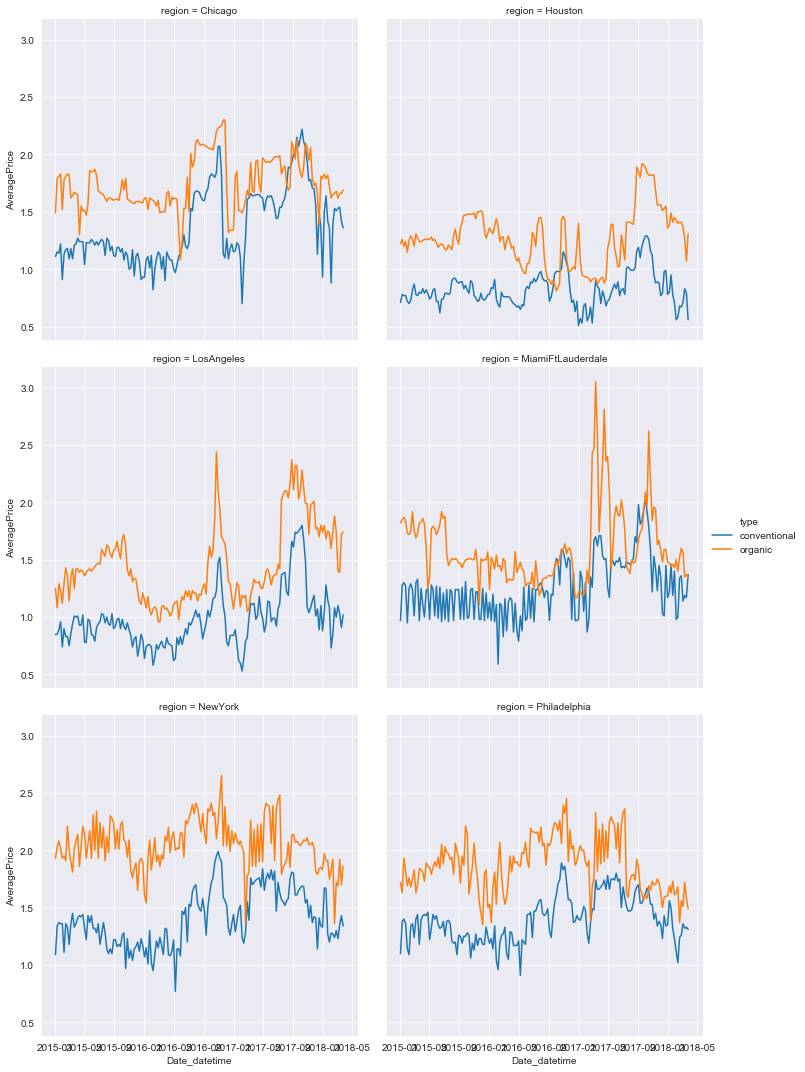

In [24]:
seaborn.relplot(x="Date_datetime", y="AveragePrice", 
                hue="type", col_wrap=2,col="region", kind="line",
             data=target_regions)

## 2. Volume Chart

In [25]:
national_total = avocado[:][avocado.region == 'TotalUS']

In [26]:
# base on the first two record, notice the sale ratio of organic vs. conventional is around 50
# which means, organic avocado sale is only 2% as conventional

### (a). weekly national sale trend

In [27]:
seaborn.set_style('whitegrid')

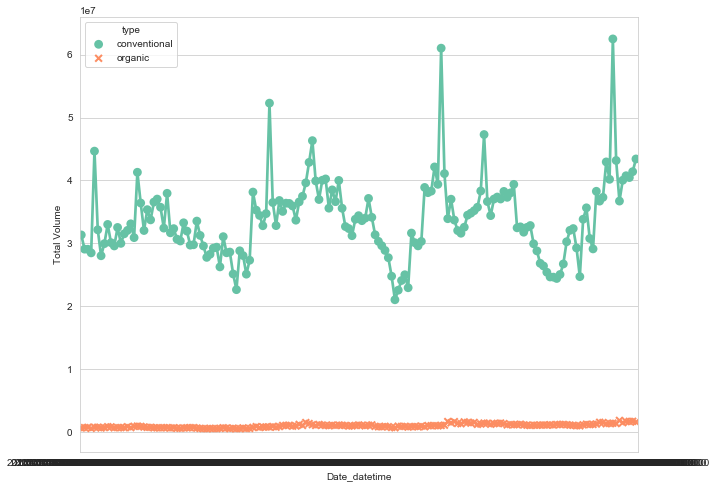

In [28]:
seaborn.pointplot(x="Date_datetime", y="Total Volume",
             hue="type",  palette="Set2",markers=["o", "x"],
             data=national_total)

### (b). weekly regional sale trend


In [29]:
regional_total = avocado[:][avocado.region != 'TotalUS']
regional_total[:3]

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Date_datetime,week,month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,2015-12-27,52,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,2015-12-20,51,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,2015-12-13,50,12


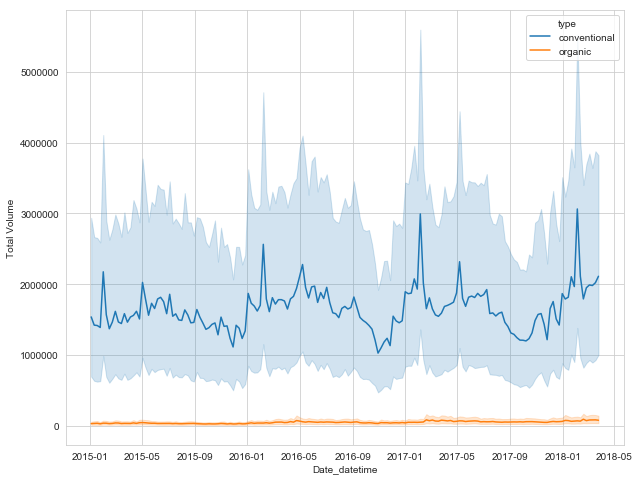

In [30]:
# regional sale trend, blue line shows the average 
seaborn.lineplot(x="Date_datetime", y="Total Volume",
             hue="type",  #palette="tab10",#style="year",
             data=avocado)

### (c). national monthly sale volume 

In [31]:
national_monthly_sale = national_total.groupby(['month','year'])['Total Volume'].sum().reset_index()

In [32]:
national_monthly_sale[:4]

,month,year,Total Volume
0,1,2015,1.204535e+08
1,1,2016,1.791182e+08
2,1,2017,2.014619e+08
3,1,2018,1.627295e+08


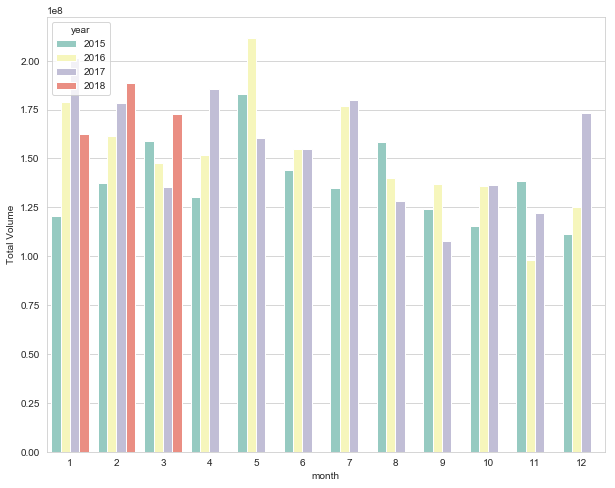

In [33]:
seaborn.barplot(x="month", y="Total Volume",
             hue="year",  palette="Set3",#col="type", kind='bar',
             data=national_monthly_sale)

In [34]:
# Feb 2016 is the largest-sale month with over 200 million avocados

In [35]:
regional_monthly_sale = regional_total.groupby(['month','year','region'])['Total Volume'].sum().reset_index()

In [41]:
regional_monthly_sale[:][regional_monthly_sale['Total Volume'] == regional_monthly_sale['Total Volume'].max()]

,month,year,region,Total Volume
899,5,2016,West,39186978.62


In [36]:
target_regions_sale = regional_monthly_sale[:][regional_monthly_sale.region.\
                                          str.contains("NewYork|Chicago|LosAngeles|Houston|MiamiFtLauderdale|Philadelphia")]

In [37]:
# average monthly sale in each region
target_regions_sale.groupby('region')['Total Volume'].mean()

region
Chicago              3.428265e+06
Houston              5.209433e+06
LosAngeles           1.302299e+07
MiamiFtLauderdale    2.504442e+06
NewYork              6.172670e+06
Philadelphia         1.842020e+06
Name: Total Volume, dtype: float64

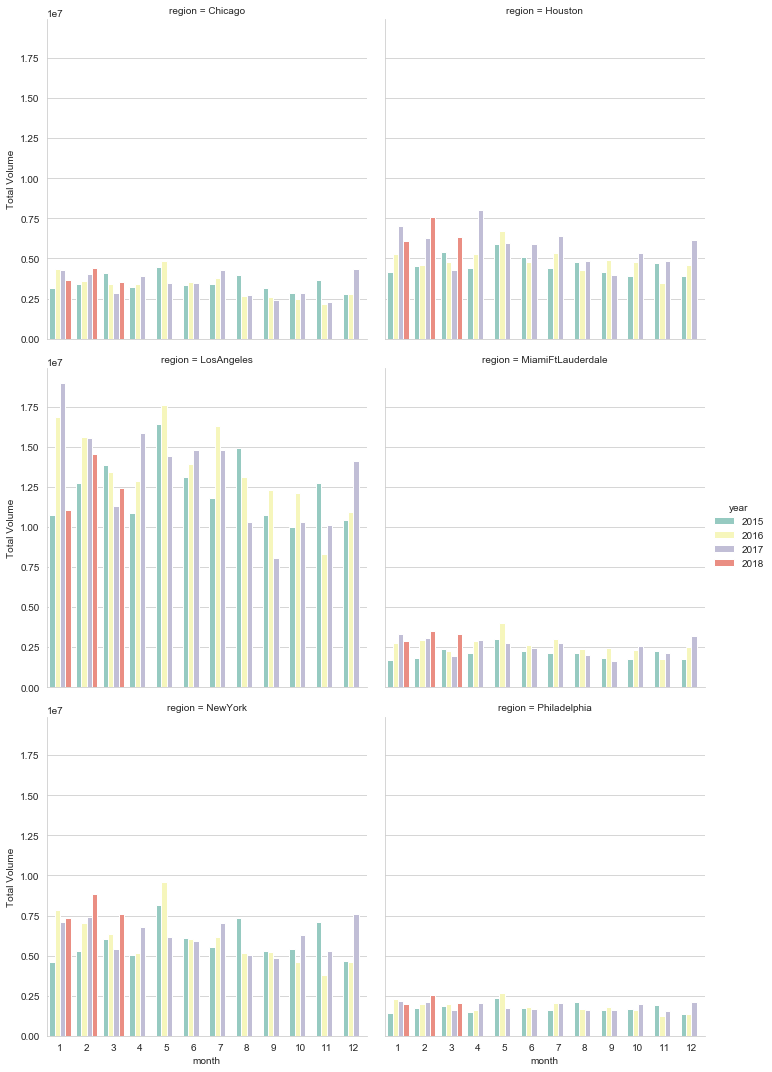

In [38]:
seaborn.catplot(x="month", y="Total Volume",
             hue="year",  palette="Set3", col="region",col_wrap=2, kind='bar', 
             data=target_regions_sale)

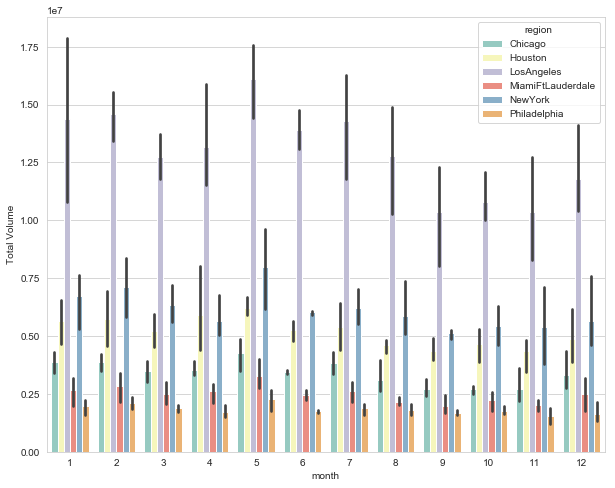

In [39]:
seaborn.barplot(x="month", y="Total Volume",
             hue="region",  palette="Set3",#col="type", kind='bar',
             data=target_regions_sale)
